# SalesdataAnalysis
by 170303108041 Vatsal Mehta
## Importing Data

In [8]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime


# Reading data into dataframes

In [12]:
os.chdir('C:\\Users\\JIGAR MEHTA\\Desktop\\SalesAnalysis\\Output')

In [13]:
all_months_data=pd.read_csv('all_data.csv')
print(all_months_data.columns)


Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')


# Q. WHICH MONTH HAS THE HIGHEST SALES?


## 1. Making a month column for analysing


In [34]:
#print(all_months_data['Order Date']) 
all_months_data['month']=all_months_data['Order Date'].str[0:2]
print(all_months_data)

       Order ID                     Product      Order Date  \
0        176558        USB-C Charging Cable  04/19/19 08:46   
2        176559  Bose SoundSport Headphones  04/07/19 22:30   
3        176560                Google Phone  04/12/19 14:38   
4        176560            Wired Headphones  04/12/19 14:38   
5        176561            Wired Headphones  04/30/19 09:27   
...         ...                         ...             ...   
186845   259353      AAA Batteries (4-pack)  09/17/19 20:56   
186846   259354                      iPhone  09/01/19 16:00   
186847   259355                      iPhone  09/23/19 07:39   
186848   259356      34in Ultrawide Monitor  09/19/19 17:30   
186849   259357        USB-C Charging Cable  09/30/19 00:18   

                               Purchase Address month  Quantity   Price  
0                  917 1st St, Dallas, TX 75001    04         2   11.95  
2             682 Chestnut St, Boston, MA 02215    04         1   99.99  
3          669 Spruce

## 2. Removing scrap rows in data

In [35]:

all_months_data=all_months_data[all_months_data['month']!='Or']




## 3. Data type change

In [36]:
#all_months_data['Quantity']=all_months_data['Quantity Ordered']
#all_months_data['Price']=all_months_data['Price Each']
all_months_data['month']=pd.to_numeric(all_months_data['month'])
all_months_data['Quantity']=pd.to_numeric(all_months_data['Quantity'])
all_months_data['Price']=pd.to_numeric(all_months_data['Price'])
all_months_data=all_months_data.dropna()


all_months_data

,Order ID,Product,Order Date,Purchase Address,month,Quantity,Price
0,176558,USB-C Charging Cable,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,2,11.95
2,176559,Bose SoundSport Headphones,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,1,99.99
3,176560,Google Phone,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,1,600.00
4,176560,Wired Headphones,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,1,11.99
5,176561,Wired Headphones,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,1,11.99
...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,3,2.99
186846,259354,iPhone,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,1,700.00
186847,259355,iPhone,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,1,700.00
186848,259356,34in Ultrawide Monitor,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,1,379.99


## 4. Defining a sales column

In [37]:
all_months_data['sales']=all_months_data['Quantity'] * all_months_data['Price']
all_months_data

,Order ID,Product,Order Date,Purchase Address,month,Quantity,Price,sales
0,176558,USB-C Charging Cable,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,2,11.95,23.90
2,176559,Bose SoundSport Headphones,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,1,99.99,99.99
3,176560,Google Phone,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,1,600.00,600.00
4,176560,Wired Headphones,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,1,11.99,11.99
5,176561,Wired Headphones,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,1,11.99,11.99
...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,3,2.99,8.97
186846,259354,iPhone,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,1,700.00,700.00
186847,259355,iPhone,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,1,700.00,700.00
186848,259356,34in Ultrawide Monitor,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,1,379.99,379.99


In [38]:


result=all_months_data.groupby('month').sum()
result

,Quantity,Price,sales
month,,,
1,10903,1.811768e+06,1.822257e+06
2,13449,2.188885e+06,2.202022e+06
3,17005,2.791208e+06,2.807100e+06
4,20558,3.367671e+06,3.390670e+06
5,18667,3.135125e+06,3.152607e+06
6,15253,2.562026e+06,2.577802e+06
7,16072,2.632540e+06,2.647776e+06
8,13448,2.230345e+06,2.244468e+06
9,13109,2.084992e+06,2.097560e+06


## 5. Plotting the graph for finding the month 

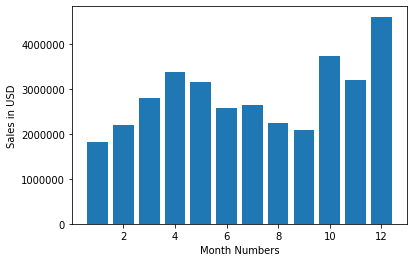

In [39]:
plt.bar(range(1,13),result['sales'])
plt.xlabel('Month Numbers')
plt.ylabel('Sales in USD')
plt.show()


# Q2. what city has the highest sales

## 1. Making a city column

In [40]:
ls=[]
for i in all_months_data['Purchase Address']:
    #print(i)
    ls.append(i.split(',')[1] + ' ' + i.split(',')[2].split(' ')[1])
all_months_data['city']=ls

#x='rgr,vrf,wgwr'
#x.split(',')[1]

In [41]:
all_months_data
#pd.unique(all_months_data['city'])

,Order ID,Product,Order Date,Purchase Address,month,Quantity,Price,sales,city
0,176558,USB-C Charging Cable,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,2,11.95,23.90,Dallas TX
2,176559,Bose SoundSport Headphones,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,1,99.99,99.99,Boston MA
3,176560,Google Phone,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,1,600.00,600.00,Los Angeles CA
4,176560,Wired Headphones,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,1,11.99,11.99,Los Angeles CA
5,176561,Wired Headphones,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,1,11.99,11.99,Los Angeles CA
...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,3,2.99,8.97,Los Angeles CA
186846,259354,iPhone,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,1,700.00,700.00,San Francisco CA
186847,259355,iPhone,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,1,700.00,700.00,San Francisco CA
186848,259356,34in Ultrawide Monitor,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,1,379.99,379.99,San Francisco CA


## 2. Grouping by city name

In [42]:
data=all_months_data.groupby('city').sum()
data

,month,Quantity,Price,sales
city,,,,
Atlanta GA,104794,16602,2.779908e+06,2.795499e+06
Austin TX,69829,11153,1.809874e+06,1.819582e+06
Boston MA,141112,22528,3.637410e+06,3.661642e+06
Dallas TX,104620,16730,2.752628e+06,2.767975e+06
Los Angeles CA,208325,33289,5.421435e+06,5.452571e+06
New York City NY,175741,27932,4.635371e+06,4.664317e+06
Portland ME,17144,2750,4.471893e+05,4.497583e+05
Portland OR,70621,11303,1.860558e+06,1.870732e+06
San Francisco CA,315520,50239,8.211462e+06,8.262204e+06


In [43]:
data.index.get_level_values('city')

Index([' Atlanta GA', ' Austin TX', ' Boston MA', ' Dallas TX',
       ' Los Angeles CA', ' New York City NY', ' Portland ME', ' Portland OR',
       ' San Francisco CA', ' Seattle WA'],
      dtype='object', name='city')

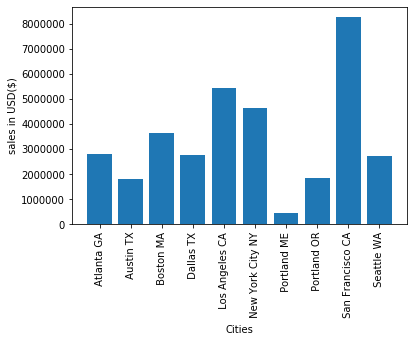

In [44]:
cities=data.index.get_level_values('city')
plt.bar(cities,data['sales'])

plt.xlabel('Cities')
plt.xticks(cities,rotation='vertical')
plt.ylabel('sales in USD($)')
plt.show()


## Q3. What time should we display advertisemens to maximize the likelihood of customer’s buying product?

### 1. Making Time column

In [45]:
all_months_data['Order Date']=pd.to_datetime(all_months_data['Order Date'])
all_months_data.head(7)


,Order ID,Product,Order Date,Purchase Address,month,Quantity,Price,sales,city
0,176558,USB-C Charging Cable,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,2,11.95,23.90,Dallas TX
2,176559,Bose SoundSport Headphones,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,1,99.99,99.99,Boston MA
3,176560,Google Phone,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,1,600.00,600.00,Los Angeles CA
4,176560,Wired Headphones,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,1,11.99,11.99,Los Angeles CA
5,176561,Wired Headphones,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,1,11.99,11.99,Los Angeles CA
6,176562,USB-C Charging Cable,2019-04-29 13:03:00,"381 Wilson St, San Francisco, CA 94016",4,1,11.95,11.95,San Francisco CA
7,176563,Bose SoundSport Headphones,2019-04-02 07:46:00,"668 Center St, Seattle, WA 98101",4,1,99.99,99.99,Seattle WA


## 2. converting datatype

In [46]:

all_months_data['minutes']=all_months_data['Order Date'].dt.minute
all_months_data['hour']=all_months_data['Order Date'].dt.hour
all_months_data.head()

,Order ID,Product,Order Date,Purchase Address,month,Quantity,Price,sales,city,minutes,hour
0,176558,USB-C Charging Cable,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,2,11.95,23.90,Dallas TX,46,8
2,176559,Bose SoundSport Headphones,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,1,99.99,99.99,Boston MA,30,22
3,176560,Google Phone,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,1,600.00,600.00,Los Angeles CA,38,14
4,176560,Wired Headphones,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,1,11.99,11.99,Los Angeles CA,38,14
5,176561,Wired Headphones,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,1,11.99,11.99,Los Angeles CA,27,9


## 3. grouping by hour

In [47]:
hr=all_months_data.groupby('hour').count()
xval=hr.index.get_level_values('hour')
xval
hr


,Order ID,Product,Order Date,Purchase Address,month,Quantity,Price,sales,city,minutes
hour,,,,,,,,,,
0,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910
1,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350
2,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243
3,831,831,831,831,831,831,831,831,831,831
4,854,854,854,854,854,854,854,854,854,854
5,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321
6,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482
7,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011
8,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256


## 4. plotting results and taking Insights

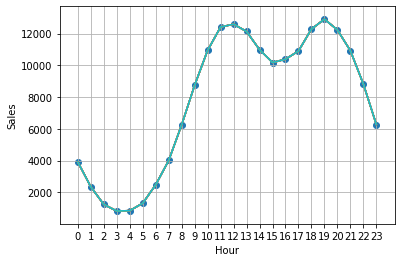

In [48]:
plt.plot(xval,all_months_data.groupby(['hour']).count())
plt.scatter(xval,hr['city'])

plt.xticks(xval)
plt.xlabel('Hour')
plt.ylabel('Sales')
plt.grid()
plt.show()

# Q5. what product sold the most?

In [49]:
all_product=all_months_data.groupby('Product',sort=False).sum()
all_product

,month,Quantity,Price,sales,minutes,hour
Product,,,,,,
USB-C Charging Cable,154819,23975,261740.85,286501.25,647586,314645
Bose SoundSport Headphones,94113,13457,1332366.75,1345565.43,392603,192445
Google Phone,38305,5532,3315000.00,3319200.00,162773,79479
Wired Headphones,133397,20557,226395.18,246478.43,554023,271720
Macbook Pro Laptop,33548,4728,8030800.00,8037600.00,137574,68261
Lightning Charging Cable,153092,23217,323787.10,347094.15,634442,312529
27in 4K Gaming Monitor,44440,6244,2429637.70,2435097.56,184331,90916
AA Batteries (4-pack),145558,27635,79015.68,106118.40,609039,298342
Apple Airpods Headphones,109477,15661,2332350.00,2349150.00,455570,223304


In [50]:
all_months_data.head(10)

,Order ID,Product,Order Date,Purchase Address,month,Quantity,Price,sales,city,minutes,hour
0,176558,USB-C Charging Cable,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,2,11.95,23.90,Dallas TX,46,8
2,176559,Bose SoundSport Headphones,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,1,99.99,99.99,Boston MA,30,22
3,176560,Google Phone,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,1,600.00,600.00,Los Angeles CA,38,14
4,176560,Wired Headphones,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,1,11.99,11.99,Los Angeles CA,38,14
5,176561,Wired Headphones,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,1,11.99,11.99,Los Angeles CA,27,9
6,176562,USB-C Charging Cable,2019-04-29 13:03:00,"381 Wilson St, San Francisco, CA 94016",4,1,11.95,11.95,San Francisco CA,3,13
7,176563,Bose SoundSport Headphones,2019-04-02 07:46:00,"668 Center St, Seattle, WA 98101",4,1,99.99,99.99,Seattle WA,46,7
8,176564,USB-C Charging Cable,2019-04-12 10:58:00,"790 Ridge St, Atlanta, GA 30301",4,1,11.95,11.95,Atlanta GA,58,10
9,176565,Macbook Pro Laptop,2019-04-24 10:38:00,"915 Willow St, San Francisco, CA 94016",4,1,1700.00,1700.00,San Francisco CA,38,10
10,176566,Wired Headphones,2019-04-08 14:05:00,"83 7th St, Boston, MA 02215",4,1,11.99,11.99,Boston MA,5,14


In [51]:
xval=pd.DataFrame()
xval['Product']=all_product.index.get_level_values('Product')
xval

xval = all_months_data[["Product", "Price"]]. values. ravel()
unique_values = pd.unique(xval)


In [52]:
#xval['Price']=all_months_data['Price'].unique()
all_months_data['Price'].unique()

array([  11.95,   99.99,  600.  ,   11.99, 1700.  ,   14.95,  389.99,
          3.84,  150.  ,    2.99,  700.  ,  300.  ,  149.99,  109.99,
        999.99,  400.  ,  379.99])

In [ ]:
yval=all_product['Quantity']

In [ ]:

prices=all_months_data.groupby('Product').mean()['Price']
fig,sold_num=plt.subplots()
price=sold_num.twinx()
price.plot(xval,prices,'b-')
sold_num.plot(xval,yval)
sold_num.set_xticklabels(xval,rotation='vertical')
sold_num.set_xlabel("Product name")
sold_num.set_ylabel("numbers sold")
sold_num.plot(xval,all_months_data['Price'])
plt.show()

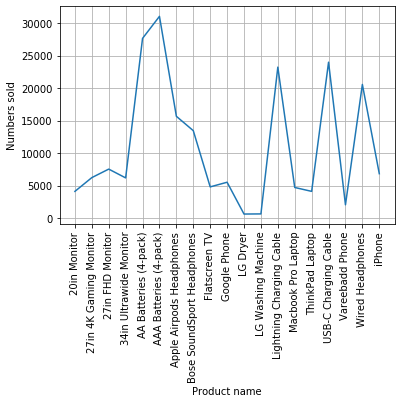

In [34]:
plt.plot()
plt.xticks(xval,rotation='vertical')
plt.xlabel('')
plt.ylabel('Numbers sold')
plt.grid()
plt.show()